<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/ocorrencias_aeronauticas_da_aviacao_civil_brasileira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="10%" src="https://github.com/leonarddocchagas/data_science/blob/master/projetos/CENIPA/logo_cenipa.png?raw=true" align="center">

## Análise dos Dados do CENIPA

#### **Centro de Investigação e Prevenção de Acidentes Aeronáuticos**

O Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA) é uma Organização Militar (OM) brasileira, vinculada ao Comando da Aeronáutica (COMAER), diretamente subordinada ao Comandante da Aeronáutica. O CENIPA é responsável pelas atividades de investigação e prevenção dos acidentes aeronáuticos que ocorram em território brasileiro. Sua sede fica em Brasília - DF.





#### **O ser humano não foi feito para voar**
Mesmo se tratando do "transporte mais seguro", quem nunca sentiu frio na barriga quando passa por uma turbulência ou mesmo simplesmente, quando sabe que precisa pegar um avião. Para algumas pessoas é terrível.

Vamos investigar em busca de respostas sobre as causas dos acidentes e tentar descobrir se os desastres foram causados por falha humana ou falha da máquina.


#### **Cenário do dados**
Para uma análise mais completa, vamos juntar ao todo 5 datasets. Dessa forma poderemos explorar ao máximo, com perguntar que com toda certeza, irá surgir ao longo da análise. 
Antes de juntar todos os conjuntos de dados, vamos carregar e tratar todas individualmente.

Abaixo a representação do relacionando dos datasets.

<img alt="Colaboratory logo" width="60%" src="https://github.com/leonarddocchagas/data_science/blob/master/projetos/CENIPA/Relacionamento.png?raw=true" align="center">

## Sobre os dados

In [1]:
# importar bibiotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# redenrizar mapas
!pip install folium
import folium
from folium import plugins

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Dataset: ocorrencia_aviacao**

In [2]:
# carrega e exibe dataset df_ocorrencia_aviacao
df_ocorrencia_aviacao = pd.read_excel('/content/drive/My Drive/Colab Data Science/Projetos/CENIPA/ocorrencia_aviacao.xlsx')
df_ocorrencia_aviacao.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,39115,39115,39115,39115,39115,ACIDENTE,-133805555556,-446172222222,CORRENTINA,BA,BRASIL,SNTY,2010-02-07,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,2011-07-21,2,1,NÃO
1,39155,39155,39155,39155,39155,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,****,2010-02-05,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO
2,39156,39156,39156,39156,39156,INCIDENTE GRAVE,-152402777778,-593541666667,CASCAVEL,PR,BRASIL,SBCA,2010-01-10,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,2011-06-30,2,1,NÃO
3,39158,39158,39158,39158,39158,INCIDENTE,***,***,BELÉM,PA,BRASIL,****,2010-01-28,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO
4,39176,39176,39176,39176,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,BRASIL,****,2010-02-05,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO


O dataset **ocorrencia_aviacao** está com a variável `codigo_ocorrencia` replicado. Pela imagem que temos do relacionamento das tabelas, o analista do CENIPA, preferiu criar a mesma chave várias vezes para conectar as diferentes tabelas. Em nosso caso, vamos tratar e deixar apenas uma.  

In [3]:
# excluindo colunas
df_ocorrencia_aviacao = df_ocorrencia_aviacao.drop(['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4'], axis=1)

# exibi dataset
df_ocorrencia_aviacao.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,39115,ACIDENTE,-133805555556,-446172222222,CORRENTINA,BA,BRASIL,SNTY,2010-02-07,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,2011-07-21,2,1,NÃO
1,39155,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,****,2010-02-05,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO
2,39156,INCIDENTE GRAVE,-152402777778,-593541666667,CASCAVEL,PR,BRASIL,SBCA,2010-01-10,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,2011-06-30,2,1,NÃO
3,39158,INCIDENTE,***,***,BELÉM,PA,BRASIL,****,2010-01-28,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO
4,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,BRASIL,****,2010-02-05,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO


Vamos continuar tratando. Como o principal objetivo desta exploração é de investigar a quantidade de acidentes, vamos elimitar outras variáveis que não serão úteis. 

In [4]:
# excluindo colunas
df_ocorrencia_aviacao = df_ocorrencia_aviacao.drop(
      ['ocorrencia_pais', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'total_recomendacoes','investigacao_aeronave_liberada', 'total_aeronaves_envolvidas', 'ocorrencia_saida_pista'], 
      axis=1
      )
# exibi dataset
df_ocorrencia_aviacao.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status
0,39115,ACIDENTE,-133805555556,-446172222222,CORRENTINA,BA,SNTY,2010-02-07,17:40:00,FINALIZADA
1,39155,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,****,2010-02-05,12:55:00,FINALIZADA
2,39156,INCIDENTE GRAVE,-152402777778,-593541666667,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,FINALIZADA
3,39158,INCIDENTE,***,***,BELÉM,PA,****,2010-01-28,16:00:00,FINALIZADA
4,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,****,2010-02-05,09:30:00,FINALIZADA


In [5]:
# tamanho dataset
print('Variáveis: {}' .format(df_ocorrencia_aviacao.shape[1]))
print('Entradas: {} \n' .format(df_ocorrencia_aviacao.shape[0]))

df_ocorrencia_aviacao.info();

Variáveis: 10
Entradas: 5245 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   codigo_ocorrencia         5245 non-null   int64         
 1   ocorrencia_classificacao  5245 non-null   object        
 2   ocorrencia_latitude       3549 non-null   object        
 3   ocorrencia_longitude      3548 non-null   object        
 4   ocorrencia_cidade         5245 non-null   object        
 5   ocorrencia_uf             5245 non-null   object        
 6   ocorrencia_aerodromo      5245 non-null   object        
 7   ocorrencia_dia            5245 non-null   datetime64[ns]
 8   ocorrencia_hora           5236 non-null   object        
 9   investigacao_status       4887 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 409.9+ KB


**Dataset: ocorrencia_tipo**

In [6]:
# carrega e exibe dataset df_fator_contribuinte
df_ocorrencia_tipo = pd.read_excel('/content/drive/My Drive/Colab Data Science/Projetos/CENIPA/ocorrencia_tipo.xlsx')

# renomeia coluna
df_ocorrencia_tipo = df_ocorrencia_tipo.rename(columns={'codigo_ocorrencia1':'codigo_ocorrencia'})

# exibi dataset
df_ocorrencia_tipo.head()

,codigo_ocorrencia,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP


In [7]:
# tamanho dataset
print('Variáveis: {}' .format(df_ocorrencia_tipo.shape[1]))
print('Entradas: {} \n' .format(df_ocorrencia_tipo.shape[0]))

df_ocorrencia_tipo.info();

Variáveis: 4
Entradas: 5317 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia          5317 non-null   int64 
 1   ocorrencia_tipo            5317 non-null   object
 2   ocorrencia_tipo_categoria  5317 non-null   object
 3   taxonomia_tipo_icao        5317 non-null   object
dtypes: int64(1), object(3)
memory usage: 166.3+ KB


**Dataset: fator_contribuinte**

In [8]:
# carrega e exibe dataset df_fator_contribuinte
df_fator_contribuinte = pd.read_excel('/content/drive/My Drive/Colab Data Science/Projetos/CENIPA/fator_contribuinte.xlsx')

# renomeia coluna
df_fator_contribuinte = df_fator_contribuinte.rename(columns={'codigo_ocorrencia3':'codigo_ocorrencia'})

# exibi dataset
df_fator_contribuinte.head()

,codigo_ocorrencia,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


**Nota.** Penas 5 primeiras linhas, podemos perceber que um aciente pode ser causado por diversos fatores. Préviamente, isso reforça o quanto é seguro voar. 

**Dataset: aeronave**

In [9]:
# carrega e exibe dataset df_fator_contribuinte
df_aeronave = pd.read_excel('/content/drive/My Drive/Colab Data Science/Projetos/CENIPA/aeronave.xlsx')

# renomeia coluna
df_aeronave = df_aeronave.rename(columns={'codigo_ocorrencia2': 'codigo_ocorrencia'})

# exibi dataset
df_aeronave.head()

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


In [10]:
# tamanho dataset
print('Variáveis: {}'.format(df_aeronave.shape[1]))
print('Entradas: {} \n'.format(df_aeronave.shape[0]))

df_aeronave.info()

Variáveis: 23
Entradas: 5307 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia            5307 non-null   int64  
 1   aeronave_matricula           5307 non-null   object 
 2   aeronave_operador_categoria  5307 non-null   object 
 3   aeronave_tipo_veiculo        5307 non-null   object 
 4   aeronave_fabricante          5307 non-null   object 
 5   aeronave_modelo              5307 non-null   object 
 6   aeronave_tipo_icao           5307 non-null   object 
 7   aeronave_motor_tipo          5307 non-null   object 
 8   aeronave_motor_quantidade    5307 non-null   object 
 9   aeronave_pmd                 5307 non-null   int64  
 10  aeronave_pmd_categoria       5307 non-null   int64  
 11  aeronave_assentos            5182 non-null   float64
 12  aeronave_ano_fabricacao      5189 non-null   

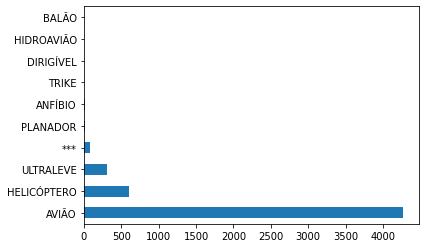

In [11]:
df_aeronave['aeronave_tipo_veiculo'].value_counts().plot.barh();

**Dataset: Recomendação**

In [12]:
# carrega e exibe dataset df_fator_contribuinte
df_recomendacao = pd.read_excel('/content/drive/My Drive/Colab Data Science/Projetos/CENIPA/recomendacao.xlsx')

# renomeia coluna
df_recomendacao = df_recomendacao.rename(columns={'codigo_ocorrencia4':'codigo_ocorrencia'})

# exibi dataset
df_recomendacao.head()

,codigo_ocorrencia,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,39115,095/2011,2011-07-21,2011-08-01 00:00:00,2015-12-21 00:00:00,Revisar os requisitos de experiência recente p...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,39115,096/2011,2011-07-21,2011-08-01 00:00:00,2011-09-16 00:00:00,Divulgar o presente relatório final aos operad...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,39156,063/2011,2011-06-30,2011-08-01 00:00:00,2011-09-12 00:00:00,Divulgar este Relatório aos operadores de aero...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,39156,064/2011,2011-06-30,2011-08-01 00:00:00,2014-04-16 00:00:00,Acompanhar junto à autoridade primária de cert...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,39235,205/2011,2011-08-29,2011-09-29 00:00:00,2012-11-06 00:00:00,Realizar uma vistoria de segurança de voo na A...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


In [13]:
# tamanho dataset
print('Variáveis: {}'.format(df_recomendacao.shape[1]))
print('Entradas: {} \n'.format(df_recomendacao.shape[0]))

df_recomendacao.info()

Variáveis: 9
Entradas: 1512 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   codigo_ocorrencia                1512 non-null   int64         
 1   recomendacao_numero              1512 non-null   object        
 2   recomendacao_dia_assinatura      1512 non-null   datetime64[ns]
 3   recomendacao_dia_encaminhamento  1129 non-null   object        
 4   recomendacao_dia_feedback        932 non-null    object        
 5   recomendacao_conteudo            1512 non-null   object        
 6   recomendacao_status              1512 non-null   object        
 7   recomendacao_destinatario_sigla  1512 non-null   object        
 8   recomendacao_destinatario        1512 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 106.4+ KB


Próxima etapa será de tratamento. Revolvi manter os originais e para cada um, criar um novo apenas com as variáveis que vamos trabalhar.

Como vimos, nosso dataset **fator_contribuinte** e **recomendacao** podem existir mais de uma entrada para cada acidente, então não vamos juntar ao nosso conjunto principal. Essa junção poderia elevar os números de registros, atrapanando nossa contagem de ocorrencias de forma correta. 

In [14]:
# filtrando entradas em cada dataset
# df_ocorrencia_aviacao
df_ocorrencia_aviacao_filter = df_ocorrencia_aviacao.filter(
    items=('codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf', 
           'ocorrencia_dia','investigacao_status')
    )

# df_ocorrencia_tipo
df_ocorrencia_tipo_filter = df_ocorrencia_tipo.filter(items=('codigo_ocorrencia', 'ocorrencia_tipo'))

# df_aeronave
df_aeronave_filter = df_aeronave.filter(
    items=('codigo_ocorrencia', 'aeronave_operador_categoria', 'aeronave_tipo_veiculo', 'aeronave_motor_quantidade', 'aeronave_tipo_operacao',
           'aeronave_tipo_operacao', 'aeronave_nivel_dano')
    )

Com os dataset devidamento limpos, vamos verificar nossas variáveis em forma de gráficos. 

**Mapa**

Para plotar o mapa, é preciso que a latitude e longitude não tenham valores vazios ou nulos e também, seja do tipo float. Então, vamos separar essas duas variáveis em um novo dataset.

In [15]:
# verificando as variáveis e os valores nulos
df_ocorrencia_aviacao_filter.isnull().sum()

codigo_ocorrencia              0
ocorrencia_classificacao       0
ocorrencia_latitude         1696
ocorrencia_longitude        1697
ocorrencia_cidade              0
ocorrencia_uf                  0
ocorrencia_dia                 0
investigacao_status          358
dtype: int64

In [16]:
# separando latitude e a longitude
df_coordenadas = df_ocorrencia_aviacao_filter.filter(items=('ocorrencia_latitude', 'ocorrencia_longitude'))
df_coordenadas.head()

,ocorrencia_latitude,ocorrencia_longitude
0,-133805555556,-446172222222
1,NaN,NaN
2,-152402777778,-593541666667
3,***,***
4,NaN,NaN


In [17]:
# elimitando valores nulos
df_coordenadas.dropna(how='any', inplace=True)
df_coordenadas.head()

,ocorrencia_latitude,ocorrencia_longitude
0,-133805555556,-446172222222
2,-152402777778,-593541666667
3,***,***
6,-180583333333,-501458333333
7,-235758333333,-467022222222


In [18]:
# retirar os '***'
df_coordenadas = df_coordenadas[df_coordenadas['ocorrencia_latitude'] != '***']
df_coordenadas.head()

,ocorrencia_latitude,ocorrencia_longitude
0,-133805555556,-446172222222
2,-152402777778,-593541666667
6,-180583333333,-501458333333
7,-235758333333,-467022222222
9,-6615,-641116666667


**Outras Visões**


In [19]:
# ocorrencia por UFs
df_ocorrencia_aviacao_filter['ocorrencia_uf'].value_counts() / df_ocorrencia_aviacao_filter['ocorrencia_uf'].shape[0]*100

SP     23.622498
MG      9.189704
RJ      9.151573
PR      8.408008
RS      6.367969
GO      5.452812
PA      5.014299
MT      4.861773
AM      4.137274
BA      3.813155
SC      3.164919
MS      2.516683
DF      2.459485
PE      1.715920
CE      1.487131
ES      1.334604
MA      1.296473
AC      1.029552
RR      0.934223
TO      0.877026
PI      0.686368
AL      0.571973
RO      0.571973
PB      0.438513
SE      0.400381
RN      0.266921
AP      0.171592
***     0.057197
Name: ocorrencia_uf, dtype: float64


Primeiro uma distribuição em percentual por estado. Vimos que São Paulo se destaca como estado com maior ocorrencia, representando 23%. Para sabermos se esse número é bom ou ruim, seria preciso, termos também um dataset com frequencia de decolagem. Assim, seria possível comparar a quantidade de acidentes com o número de decolagem.  

Mas, como a análise é para fins didáticos, vou restringir ainda mais o dataset. Por ser minha região, vamos trabalhar as ocorrencias no Nordeste e em especial, Pernambuco. 

In [20]:
# eliminando latitude e longitude
df_ocorrencia_aviacao_ne = df_ocorrencia_aviacao_filter.filter(
      items=('codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_dia')
      )

In [21]:
# carregar apenas estados da região nordeste
df_ocorrencia_aviacao_ne = df_ocorrencia_aviacao_ne.loc[df_ocorrencia_aviacao_ne['ocorrencia_uf'].isin(['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'])]


Acho interessante trazer a informação sobre a aeronave envolvida no acidente. Para isso, vamos exibir e depois selecionar as informações para juntar ao dataset das ocorrencias.

In [22]:
# exibir informações sobre a aeronave
df_aeronave.head()

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


In [23]:
# selecionando colunas
tipo_aeronave = df_aeronave.filter(items=('codigo_ocorrencia','aeronave_tipo_veiculo', 'aeronave_tipo_operacao'))

In [24]:
# exibindo novo dataset
df_ocorrencia_aviacao_ne.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia
0,39115,ACIDENTE,CORRENTINA,BA,2010-02-07
4,39176,INCIDENTE,SÃO LUÍS,MA,2010-02-05
32,39747,INCIDENTE,CAIRU,BA,2010-01-31
38,39807,INCIDENTE,SALVADOR,BA,2010-01-06
40,39810,INCIDENTE,SALVADOR,BA,2010-01-15


In [25]:
# juntado datasets (tipo_aeronave e df_ocorrencia)
df_ocorrencia_aviacao_ne = pd.merge(df_ocorrencia_aviacao_ne, tipo_aeronave, on='codigo_ocorrencia')
df_ocorrencia_aviacao_ne.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,aeronave_tipo_veiculo,aeronave_tipo_operacao
0,39115,ACIDENTE,CORRENTINA,BA,2010-02-07,AVIÃO,PRIVADA
1,39176,INCIDENTE,SÃO LUÍS,MA,2010-02-05,AVIÃO,REGULAR
2,39747,INCIDENTE,CAIRU,BA,2010-01-31,AVIÃO,TÁXI AÉREO
3,39807,INCIDENTE,SALVADOR,BA,2010-01-06,AVIÃO,INSTRUÇÃO
4,39810,INCIDENTE,SALVADOR,BA,2010-01-15,AVIÃO,TÁXI AÉREO


In [26]:
# % em relação ao brasil
print('Em relação ao Brasil, o Nordeste é responável por {} das ocorrencias' .format(df_ocorrencia_aviacao_ne.shape[0] / df_ocorrencia_aviacao.shape[0]*100))

Em relação ao Brasil, o Nordeste é responável por 10.82936129647283 das ocorrencias


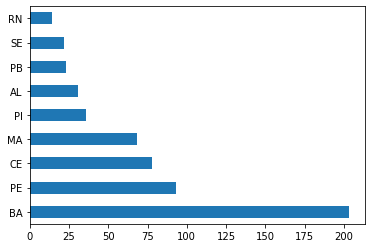

In [27]:
# quantidade ocorrencia por estado região nordeste
df_ocorrencia_aviacao_ne['ocorrencia_uf'].value_counts().plot.barh();

In [28]:
# criar coluna ano
df_ocorrencia_aviacao_ne['Ano'] = df_ocorrencia_aviacao_ne.ocorrencia_dia.dt.year

In [29]:
# exibindo novo dataset
df_ocorrencia_aviacao_ne.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,aeronave_tipo_veiculo,aeronave_tipo_operacao,Ano
0,39115,ACIDENTE,CORRENTINA,BA,2010-02-07,AVIÃO,PRIVADA,2010
1,39176,INCIDENTE,SÃO LUÍS,MA,2010-02-05,AVIÃO,REGULAR,2010
2,39747,INCIDENTE,CAIRU,BA,2010-01-31,AVIÃO,TÁXI AÉREO,2010
3,39807,INCIDENTE,SALVADOR,BA,2010-01-06,AVIÃO,INSTRUÇÃO,2010
4,39810,INCIDENTE,SALVADOR,BA,2010-01-15,AVIÃO,TÁXI AÉREO,2010


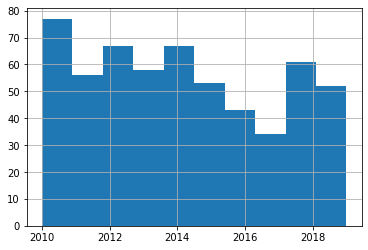

In [30]:
# distribuição de acidentes ao longo dos anos
df_ocorrencia_aviacao_ne['Ano'].hist();

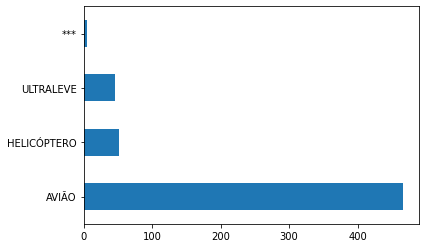

In [31]:
# tipo de aeronaves envolvidas
df_ocorrencia_aviacao_ne['aeronave_tipo_veiculo'].value_counts().plot.barh();

Agora, vamos analisar acidentes em Pernambuco.

In [32]:
# selecionar e exibir informações do estado de pernambuco
df_ocorrencias_pe = df_ocorrencia_aviacao_ne[df_ocorrencia_aviacao_ne['ocorrencia_uf'].isin(['PE'])]
df_ocorrencias_pe.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,aeronave_tipo_veiculo,aeronave_tipo_operacao,Ano
8,40271,ACIDENTE,RECIFE,PE,2010-04-21,AVIÃO,INSTRUÇÃO,2010
10,40325,INCIDENTE GRAVE,EXU,PE,2010-02-19,AVIÃO,PRIVADA,2010
11,40326,INCIDENTE,RECIFE,PE,2010-03-31,AVIÃO,PRIVADA,2010
26,41595,INCIDENTE,PETROLINA,PE,2010-06-13,AVIÃO,TÁXI AÉREO,2010
29,41749,ACIDENTE,RECIFE,PE,2010-07-04,AVIÃO,PRIVADA,2010


In [33]:
# ocorrencias por cidades
df_ocorrencias_pe['ocorrencia_cidade'].value_counts()

RECIFE                     58
CARUARU                     9
PETROLINA                   6
IGARASSU                    4
OROCÓ                       3
CABROBÓ                     1
SÃO VICENTE FERRER          1
GAMELEIRA                   1
PRIMAVERA                   1
SIRINHAÉM                   1
SALGUEIRO                   1
JABOATÃO DOS GUARARAPES     1
NÃO IDENTIFICADA            1
FERNANDO DE NORONHA         1
FLORESTA                    1
EXU                         1
OLINDA                      1
GRAVATÁ                     1
Name: ocorrencia_cidade, dtype: int64

In [34]:
# relação de gravidade 
df_ocorrencias_pe['ocorrencia_classificacao'].value_counts() / df_ocorrencias_pe.ocorrencia_classificacao.shape[0]

INCIDENTE          0.645161
ACIDENTE           0.204301
INCIDENTE GRAVE    0.150538
Name: ocorrencia_classificacao, dtype: float64

#### Ao afunilar nosso dataset por região Nordeste e depois, pelo estado de Pernambuco, pode notar que existe registro de um aciente na cidade que eu moro, no qual eu não tinha noção. Fui investir e achei algumas informações complementares. Graças a Deus, acidente classificado como leve. Sem feridos.

In [35]:
# ocorrencia na cidade de olinda
df_ocorrencias_pe[df_ocorrencias_pe['ocorrencia_cidade'] == 'OLINDA']

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,aeronave_tipo_veiculo,aeronave_tipo_operacao,Ano
31,41837,INCIDENTE,OLINDA,PE,2010-07-11,HELICÓPTERO,POLICIAL,2010


<img alt="Colaboratory logo" width="50%" src="https://github.com/leonarddocchagas/data_science/blob/master/projetos/CENIPA/helicoptero_PRF_Olinda_06.jpg?raw=true" align="center">


##**Conclusão**

#### Os dados mostraram o quanto é seguro voar e quanto as aeronaves são seguras. Vimos que, a esmagadora maioria dos acidentes, ocorrem por falha humana e na avição civio.